## Importing Necessary Libraries

In [45]:
#linear algebra
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 25)

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

#For Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#K-Fold cross validation
from sklearn.model_selection import cross_val_score

In [46]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\temperature.csv', index_col = 'Date', parse_dates=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-07-2013' in DD/MM/YYYY format. Provide format or sp

In [47]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [48]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
2017-08-30,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
2017-08-30,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
NaT,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
NaT,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [49]:
df.shape

(7752, 24)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null

In [51]:
df.reset_index(inplace=True)
df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']   = df['Date'].dt.day

In [52]:
df.head()

,Date,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [53]:
df.isnull().sum()

Date                 2
station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

In [54]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,...,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000000,7.080645,16.370968
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,...,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,1.414305,2.238364,8.241331
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,...,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,...,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,...,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,...,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,...,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


In [55]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1892\3477633083.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median()[0], inplace=True)


### Correlation between features

In [72]:
dfcorr=df.corr()

<AxesSubplot:>

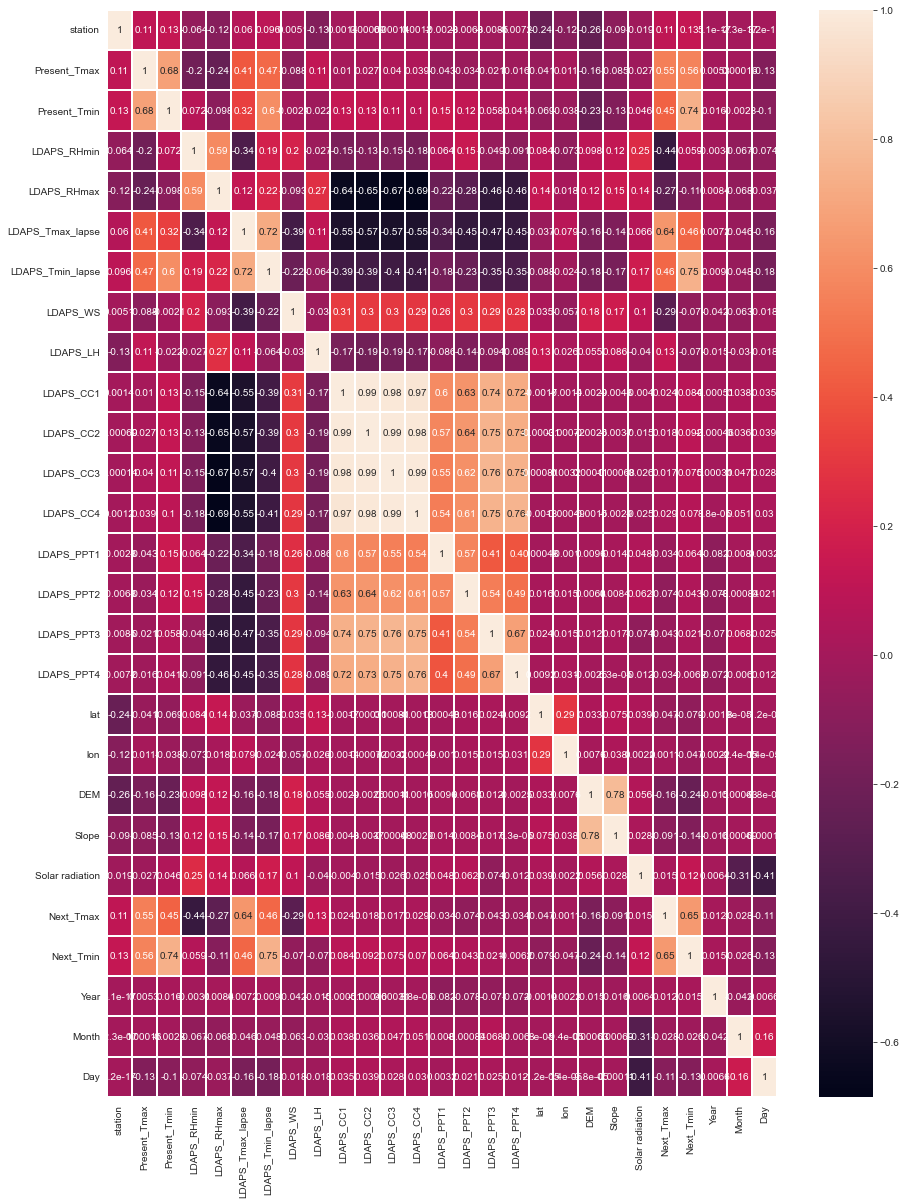

In [69]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

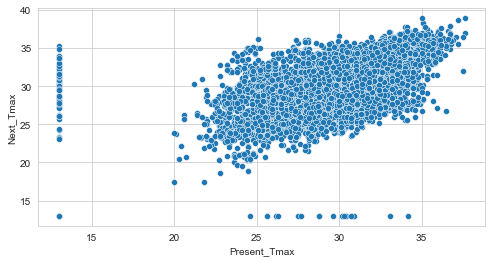

In [70]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

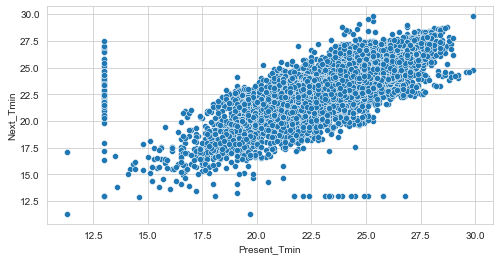

In [71]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

In [56]:
#There are 25 stations, dividing data into respective stations
station = [[] for _ in range(26)]

for i in range(1,26):
    station[i] = df.loc[df['station'] == i]

#All the columns are float64 and since the std. deviaiton is less and the total no. of
#missing values are les, filling all the nan values with the respective column avg.
for i in range(1,26):
    station[i] = station[i].fillna(station[i].mean())
    #station[i].set_index('Date', inplace=True)    


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1892\2789125485.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  station[i] = station[i].fillna(station[i].mean())


In [57]:
targets  = ['Next_Tmax','Next_Tmin']
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
            'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
            'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

#let's predict the Next_Tmax and Next_Tmin for 2017 at station-1 
train = station[1].loc[station[1]['Year']!=2017]  
valid = station[1].loc[station[1]['Year']==2017]

train = train.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
valid = valid.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)

X_train = train.iloc[:, :-2].values
Y_train_Tmax = train.iloc[:, [-2]].values
Y_train_Tmin = train.iloc[:, [-1]].values

X_test = valid.iloc[:, :-2].values
Y_test_Tmax = valid.iloc[:, [-2]].values
Y_test_Tmin = valid.iloc[:, [-1]].values


In [58]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


In [59]:

'''
Multiple Linear Regression
'''

regressor_max = LinearRegression()
regressor_max.fit(X_train, Y_train_Tmax)

regressor_min = LinearRegression()
regressor_min.fit(X_train, Y_train_Tmin)

Y_pred_Tmax  = regressor_max.predict(X_test)
Y_pred_Tmin  = regressor_min.predict(X_test)
#Y_pred_train = regressor.predict(X_train)

#K-fold cross validation
accuracies_max = cross_val_score(estimator = regressor_max, X = X_train, y = Y_train_Tmax, cv = 10)
acc_mean_max = accuracies_max.mean()
acc_std_max  = accuracies_max.std()


accuracies_min = cross_val_score(estimator = regressor_min, X = X_train, y = Y_train_Tmin, cv = 10)
acc_mean_min = accuracies_min.mean()
acc_std_min  = accuracies_min.std()

kfold = {'acc_mean_max':acc_mean_max, 'acc_std_max':acc_std_max,
         'acc_mean_min':acc_mean_min, 'acc_std_min':acc_std_min}




In [60]:
#Backelimination for Tmax
X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
sl = 0.05
arr_max = []
get_arr_max = []
for i in range(0, X_train.shape[1]):
    arr_max.append(i)

def backElimination_Tmax(X, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train_Tmax, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

    p_value =  dfs.iloc[:, 3]
    p_value_arr = p_value.tolist()
    pop_item = False
    maxpos  = p_value_arr.index(max(p_value_arr))
    if(p_value_arr[maxpos]>sl):
        get_arr.append(arr[maxpos])
        arr.pop(maxpos)
        pop_item = True
    
    if(pop_item): return backElimination_Tmax(X, arr, get_arr)
    else: 
        get_arr.sort()
        return results_summary      
      
summary_max = backElimination_Tmax(X_train_mul, arr_max, get_arr_max)

acc_max = round(regressor_max.score(X_train, Y_train_Tmax)*100, 2)



In [61]:
#Backelimination for Tmin
X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
sl = 0.05
arr_min = []
get_arr_min = []
for i in range(0, X_train.shape[1]):
    arr_min.append(i)

def backElimination_Tmin(X, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train_Tmin, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

    p_value =  dfs.iloc[:, 3]
    p_value_arr = p_value.tolist()
    pop_item = False
    maxpos  = p_value_arr.index(max(p_value_arr))
    if(p_value_arr[maxpos]>sl):
        get_arr.append(arr[maxpos])
        arr.pop(maxpos)
        pop_item = True
    
    if(pop_item): return backElimination_Tmax(X, arr, get_arr)
    else: 
        get_arr.sort()
        return results_summary      
      
summary_min = backElimination_Tmin(X_train_mul, arr_min, get_arr_min)

acc_min = round(regressor_min.score(X_train, Y_train_Tmin)*100, 2)


In [62]:
#Accuracies for Tmax and Tmin
acc = {'Tmax accuarcy':acc_max, 'Tmin_accuracy':acc_min}

Y_pred_Tmax = pd.DataFrame(Y_pred_Tmax)
Y_pred_Tmin = pd.DataFrame(Y_pred_Tmin)

Y_pred_Tmax.columns = ['Predicted Next_Tmax']
Y_pred_Tmin.columns = ['Predicted Next_Tmin']

Y_pred = pd.concat([Y_pred_Tmax, Y_pred_Tmin], axis=1, join='inner')
test = valid
test.index = [i for i in range(0,len(test))]

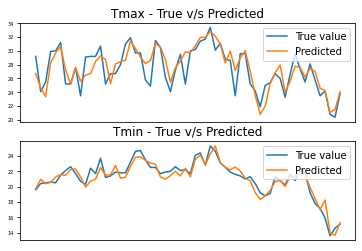

In [63]:
#plotting the results
nrows = 2
ncols = 1
fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)

ax1.plot(test['Next_Tmax'], label='True value')
ax1.plot(Y_pred['Predicted Next_Tmax'], label='Predicted')
ax1.title.set_text('Tmax - True v/s Predicted')
ax1.set_xticks([])
ax1.tick_params(axis='y', labelsize=5)
ax1.legend(loc='upper right')

ax2.plot(test['Next_Tmin'], label='True value')
ax2.plot(Y_pred['Predicted Next_Tmin'], label='Predicted')
ax2.title.set_text('Tmin - True v/s Predicted')
ax2.set_xticks([])
ax2.tick_params(axis='y', labelsize=5)
ax2.legend(loc='upper right')
